# Bayesian Analysis with Python written by Osvaldo Marthin - Chapter 2

https://thepythonguru.com/how-to-build-probabilistic-models-with-pymc3-in-bayesian/


In [1]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [15]:
# np.random.seed(123)
# n_experiments = 4
# data = stats.bernoulli.rvs(p=theta_real, size=n_experiments)
theta_real = 0.35
data = [1, 0, 0, 0]
print(data)


[1, 0, 0, 0]


In [21]:
with pm.Model() as our_first_model:
  
  # モデルのコンテナを作成
  θ = pm.Beta('θ', alpha=1, beta=1)

  # 事前分布を指定
  y = pm.Bernoulli('y', p=θ, observed=data)

  # 尤度（likelihood）を指定
  trace = pm.sample(1000, step=pm.Metropolis(), start=pm.find_MAP())


logp = -2.7726, ||grad|| = 1: 100%|██████████| 6/6 [00:00<?, ?it/s]   
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [θ]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:03<00:00, 1747.00draws/s]
The number of effective samples is smaller than 25% for some parameters.


In [20]:
our_first_model

## pymc.Beta(name, *args, **kwargs)

$$
f(x \mid \alpha, \beta) =
    \frac{x^{\alpha - 1} (1 - x)^{\beta - 1}}{B(\alpha, \beta)}
$$
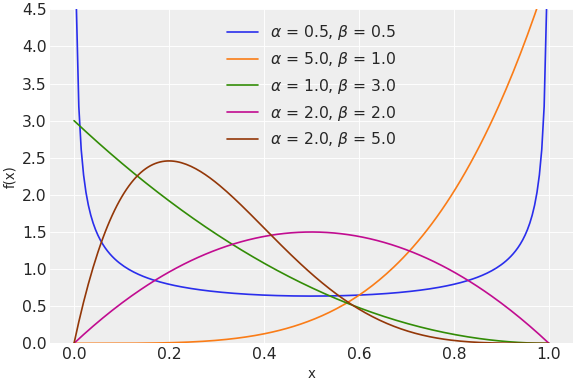


## pymc.Bernoulli(name, *args, **kwargs)

$$
f(x \mid p) = p^{x} (1-p)^{1-x}
$$

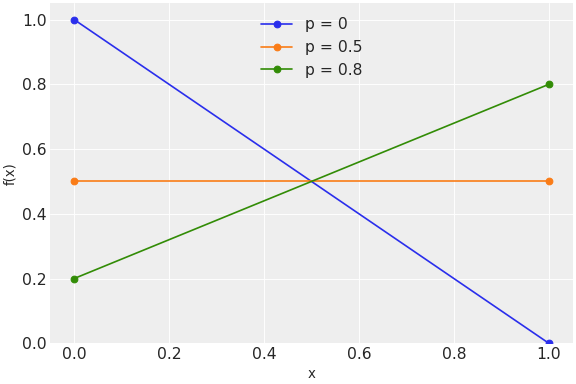


In [18]:
burnin = 100
chain = trace[burnin:]
print('trace: ', trace)
print('chain: ', chain)


trace:  <MultiTrace: 4 chains, 1000 iterations, 2 variables>
chain:  <MultiTrace: 4 chains, 900 iterations, 2 variables>


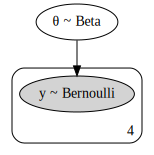

In [19]:
pm.model_to_graphviz(our_first_model)

C:\VApps\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\VApps\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\traceplot.py:212: UserWarning: A valid var_name should be provided, found {'t'} expected from {'θ'}
  warnings.warn(
<ipython-input-17-0352854e89bd>:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('img204.png', dpi=300, figsize=(5.5, 5.5))


<Figure size 432x288 with 0 Axes>

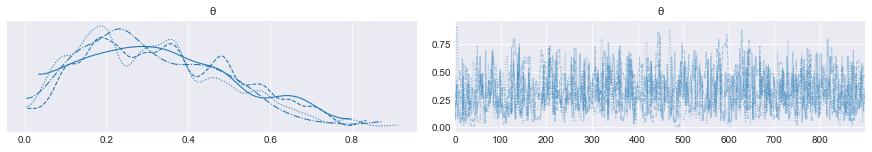

<Figure size 432x288 with 0 Axes>

In [17]:
pm.traceplot(chain, lines={'theta':theta_real});
plt.savefig('img204.png', dpi=300, figsize=(5.5, 5.5))

plt.figure()


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [θ]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:03<00:00, 1717.03draws/s]
The number of effective samples is smaller than 25% for some parameters.
C:\VApps\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\VApps\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\traceplot.py:212: UserWarning: A valid var_name should be provided, found {'t'} expected from {'θ'}
  warnings.warn(
<ipython-input-30-1700d3f3f531>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('img206.png', dpi=300, figsize=(5.5, 5.5))


<Figure size 432x288 with 0 Axes>

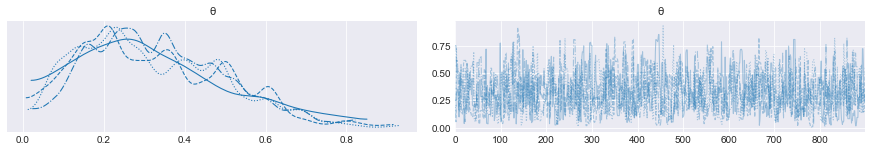

<Figure size 432x288 with 0 Axes>

In [30]:
with our_first_model:
  multi_trace = pm.sample(1000, step=pm.Metropolis(), cores=4)

burnin = 100
multi_chain = multi_trace[burnin:]
pm.traceplot(multi_chain, lines={'theta':theta_real});
plt.savefig('img206.png', dpi=300, figsize=(5.5, 5.5))

plt.figure()


C:\VApps\Anaconda3\lib\site-packages\pymc3\stats\__init__.py:43: UserWarning: gelman_rubin has been deprecated. In the future, use rhat instead.
  warnings.warn("gelman_rubin has been deprecated. In the future, use rhat instead.")
C:\VApps\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-28-71c314b165fe>:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('img207.png', dpi=300, figsize=(5.5, 5.5))


<Figure size 432x288 with 0 Axes>

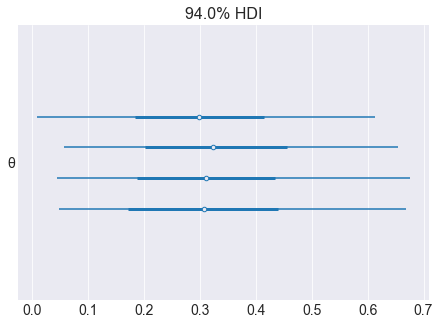

<Figure size 432x288 with 0 Axes>

In [28]:
pm.gelman_rubin(multi_chain) 
{'θ': 1.0074579751170656, 'theta_logodds': 1.009770031607315}

pm.forestplot(multi_chain) #, varnames={'theta'});
plt.savefig('img207.png', dpi=300, figsize=(5.5, 5.5))

plt.figure()


In [22]:
pm.summary(multi_chain)


C:\VApps\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
θ,0.327,0.179,0.05,0.67,0.007,0.005,735.0,674.0,712.0,678.0,1.0


C:\VApps\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-23-36e5a21743a1>:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('img208.png', dpi=300, figsize=(5.5, 5.5))


<Figure size 432x288 with 0 Axes>

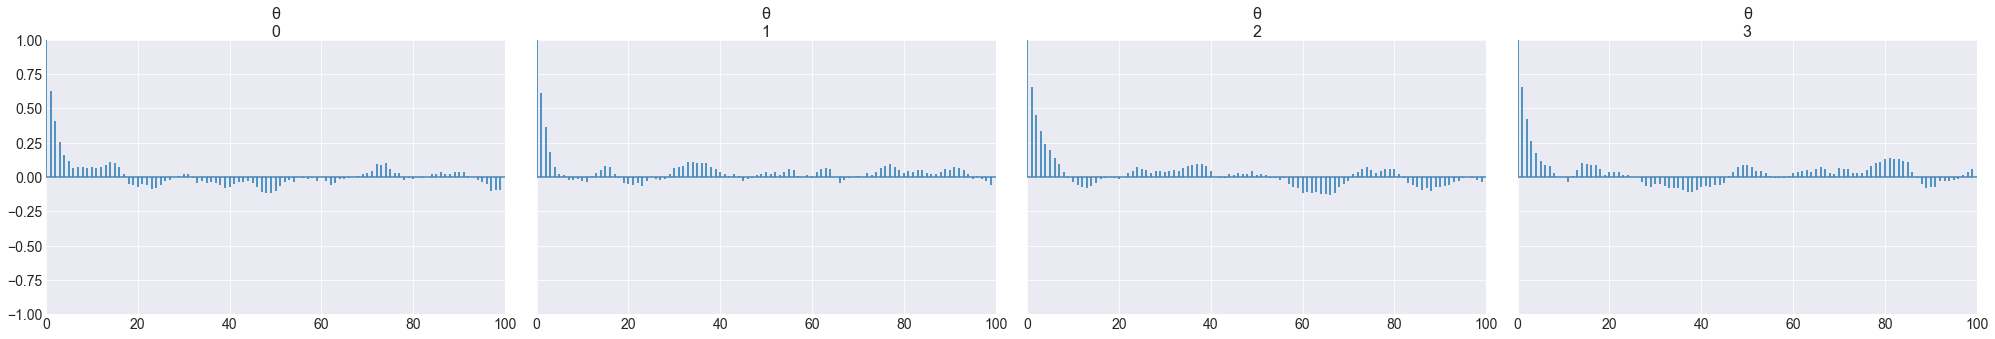

<Figure size 432x288 with 0 Axes>

In [23]:
pm.autocorrplot(chain)
plt.savefig('img208.png', dpi=300, figsize=(5.5, 5.5))

plt.figure()


In [24]:
pm.effective_n(multi_chain)['θ']


C:\VApps\Anaconda3\lib\site-packages\pymc3\stats\__init__.py:50: UserWarning: effective_n has been deprecated. In the future, use ess instead.
  warnings.warn("effective_n has been deprecated. In the future, use ess instead.")
C:\VApps\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<xarray.DataArray 'θ' ()>
array(712.24972961)

C:\VApps\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-25-47d893a8af7e>:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('img209.png', dpi=300, figsize=(5.5, 5.5))


<Figure size 432x288 with 0 Axes>

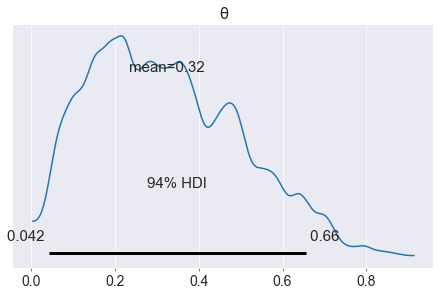

<Figure size 432x288 with 0 Axes>

In [25]:
pm.plot_posterior(chain)
# pm.plot_posterior(chain, kde_plot=True)
plt.savefig('img209.png', dpi=300, figsize=(5.5, 5.5))

plt.figure()


C:\VApps\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-26-9d1319a9767f>:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('img210.png', dpi=300, figsize=(5.5, 5.5))


<Figure size 432x288 with 0 Axes>

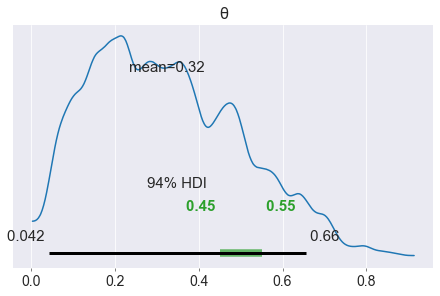

<Figure size 432x288 with 0 Axes>

In [26]:
pm.plot_posterior(chain, rope=[0.45,.55])
# pm.plot_posterior(chain, kde_plot=True, rope=[0.45,.55])
plt.savefig('img210.png', dpi=300, figsize=(5.5, 5.5))

plt.figure()

C:\VApps\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-27-a157173fc1db>:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('img211.png', dpi=300, figsize=(5.5, 5.5))


<Figure size 432x288 with 0 Axes>

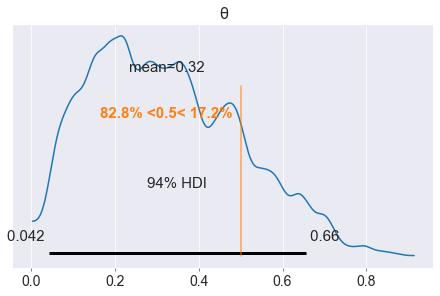

<Figure size 432x288 with 0 Axes>

In [27]:
pm.plot_posterior(chain, ref_val=0.5)
# pm.plot_posterior(chain, kde_plot=True, ref_val=0.5)
plt.savefig('img211.png', dpi=300, figsize=(5.5, 5.5))

plt.figure()